In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


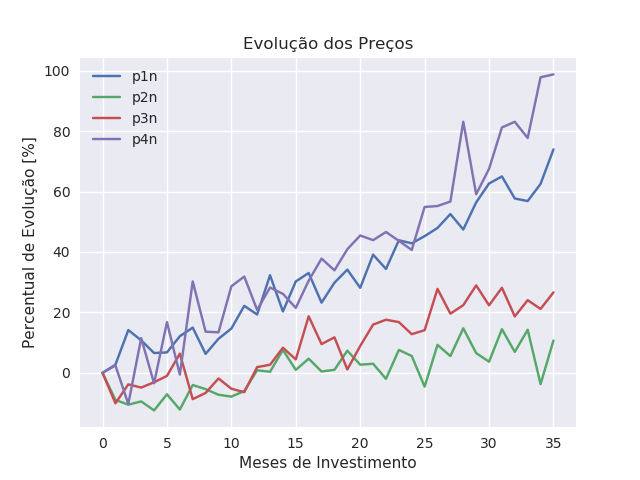

Text(0.5,0,'Meses de Investimento')

In [3]:
po=10
mu=.015
sigma=.04
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p1=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=12
mu=.008
sigma=.06
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=9
mu=.01
sigma=.05
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p3=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=13
mu=.02
sigma=.07
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p4=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

dfp=pd.DataFrame(p1)
dfp.columns=['p1']
dfp['p2']=p2
dfp['p3']=p3
dfp['p4']=p4
df=dfp.pct_change()

df.iloc[0]=[0, 0, 0, 0]
df.columns=['r1','r2','r3','r4']

dfp['p1n']=(100*dfp.iloc[:,0]/dfp.iloc[0,0])-100
dfp['p2n']=(100*dfp.iloc[:,1]/dfp.iloc[0,1])-100

dfp['p3n']=(100*dfp.iloc[:,2]/dfp.iloc[0,2])-100
dfp['p4n']=(100*dfp.iloc[:,3]/dfp.iloc[0,3])-100
dfp[['p1n','p2n','p3n','p4n']].plot()
plt.title('Evolução dos Preços')
plt.ylabel('Percentual de Evolução [%]')
plt.xlabel('Meses de Investimento')


In [4]:
C=df.cov()
sig=df.std()
MU=df.mean()
I=pd.DataFrame(np.identity(4))
SIGMA=(C*(I.values))**0.5
P=df.corr()
ONE=[1,1,1,1]
N=1000
ret=pd.DataFrame(np.zeros((N,1)))
risk=pd.DataFrame(np.zeros((N,1)))
MU

r1    0.016747
r2    0.005199
r3    0.008511
r4    0.024199
dtype: float64

<IPython.core.display.Javascript object>


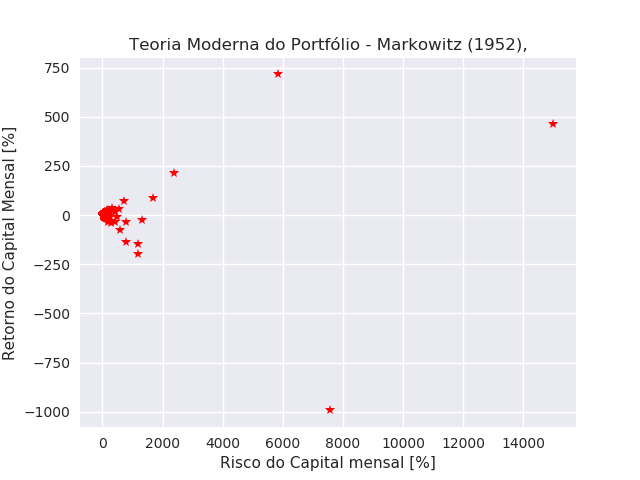

Text(0.5,0,'Risco do Capital mensal [%]')

In [5]:
for i in range(0, N):
    qabs = np.random.normal(0,100, 4)  
    qmx=qabs.max()
    qn=qabs/qmx
    qn1=qn/qn.sum()
    q=qn1.round(2)
#    print(q)
    if i==1:
        q=[1/4,1/4,1/4,1/4]
    ret[0][i]=np.dot(pd.DataFrame(q).transpose(),MU)
    risk[0][i]=(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))**0.5

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')

plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')



<IPython.core.display.Javascript object>


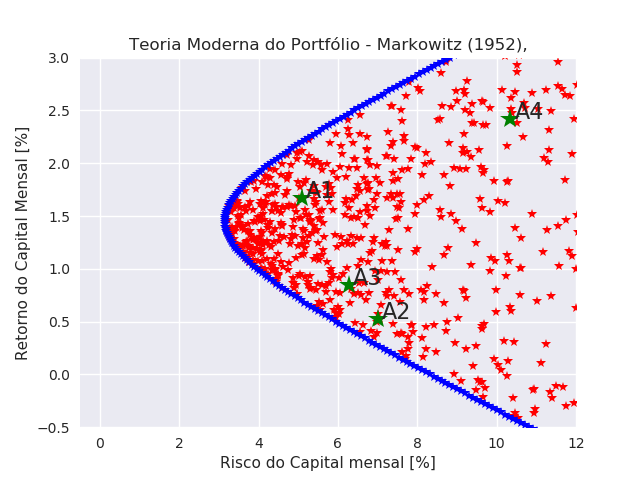

Text(0.5,0,'Risco do Capital mensal [%]')

In [6]:
a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
target_mus=np.arange(-0.1,0.1,0.0002)
risk_at_target_mus=np.zeros(len(target_mus))
for i in range(0, len(target_mus)):
    target_mu=target_mus[i]
    v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
    v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
    v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
    opt_q=(v1+v2)/v3
    risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')


<IPython.core.display.Javascript object>


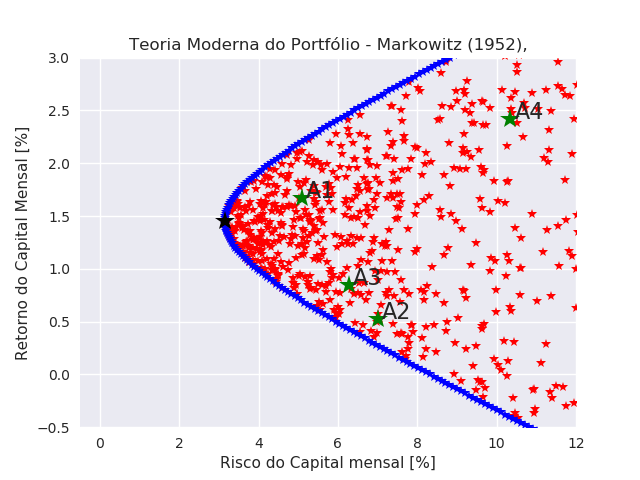

array([[0.40323375],
       [0.07319621],
       [0.33929082],
       [0.18427923]])

In [7]:
q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)

plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')
q_minrisk

In [9]:
q_minrisk

array([[0.40323375],
       [0.07319621],
       [0.33929082],
       [0.18427923]])

<IPython.core.display.Javascript object>


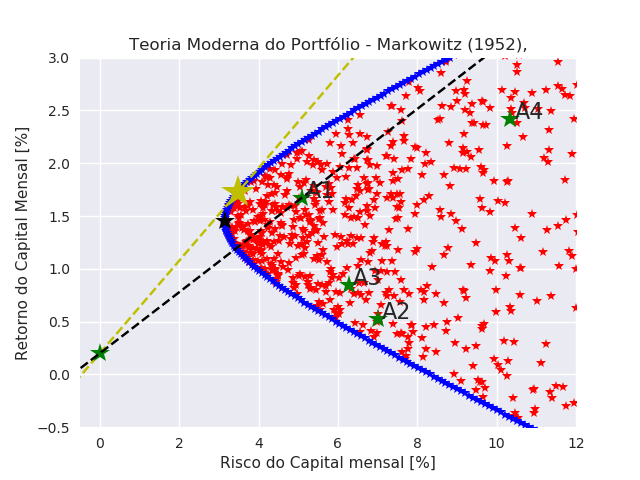

Text(0.5,0,'Risco do Capital mensal [%]')

In [10]:
rf=0.002
temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
qm=temp/temp.sum()
mu_m=np.dot(qm.transpose(),MU)
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
cm_line=sigma_m[0][0]*(target_mus-rf)/(mu_m-rf)
arbitrary_line=sig[0]*(target_mus-rf)/(MU[0]-rf)

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)
plt.plot(100*cm_line,100*target_mus,'y--')
plt.plot(0, 100*rf, 'g*', markersize=15.0)
plt.plot(100*sigma_m,100*mu_m,'y*',markersize=25.0)
plt.plot(100*arbitrary_line, 100*target_mus, 'k--');
plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')


<IPython.core.display.Javascript object>


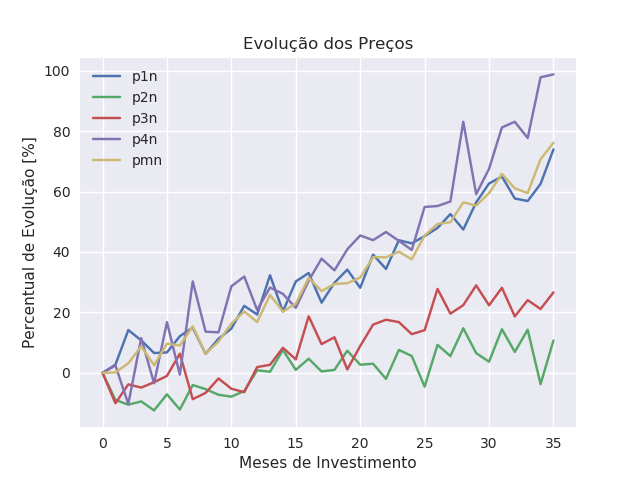

Text(0.5,0,'Meses de Investimento')

In [11]:
#fig = plt.subplots()
dfp['p1n']=(100*dfp.iloc[:,0]/dfp.iloc[0,0])-100
dfp['p2n']=(100*dfp.iloc[:,1]/dfp.iloc[0,1])-100
dfp['p3n']=(100*dfp.iloc[:,2]/dfp.iloc[0,2])-100
dfp['p4n']=(100*dfp.iloc[:,3]/dfp.iloc[0,3])-100
#dfp[['p1n','p2n','p3n','p4n']].plot()
dfp['pm']=qm[0]*dfp['p1']+qm[1]*dfp['p2']+qm[2]*dfp['p3']+qm[3]*dfp['p4']
dfp['pmn']=(100*dfp.iloc[:,8]/dfp.iloc[0,8])-100
dfp[['p1n','p2n','p3n','p4n','pmn']].plot()
plt.title('Evolução dos Preços')
plt.ylabel('Percentual de Evolução [%]')
plt.xlabel('Meses de Investimento')

In [12]:
qm

array([[ 0.48820788],
       [-0.10308376],
       [ 0.33266254],
       [ 0.28221335]])

In [23]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['BBAS3','LCAM3', 'TECN3','NATU4']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


[*********************100%***********************]  4 of 4 downloaded


In [24]:
stocks_close=stocks_all['Close']
#stocks_close.plot()
#stocks_close.tail()
stocks_all

Open                           High                      \
             BBAS3.SA   LCAM3.SA TECN3.SA   BBAS3.SA   LCAM3.SA TECN3.SA   
Date                                                                       
2016-09-21  22.860001   5.490000     4.45  23.600000   5.500000     4.47   
2016-09-22  23.600000   5.310000     4.43  23.730000   5.500000     4.49   
2016-09-23  23.299999   5.450000     4.41  23.379999   5.490000     4.45   
2016-09-26  22.670000   5.550000     4.36  22.879999   5.550000     4.36   
2016-09-27  22.760000   5.430000     4.32  22.950001   5.450000     4.34   
2016-09-28  22.990000   5.370000     4.24  23.309999   5.370000     4.25   
2016-09-29  23.340000   5.290000     4.31  23.420000   5.300000     4.35   
2016-09-30  22.650000   5.450000     4.28  23.150000   5.450000     4.38   
2016-10-03  22.900000   5.400000     4.35  23.450001   5.400000     4.36   
2016-10-04  23.299999   5.390000     4.40  23.540001   5.390000     4.40   
2016-10-05  23.500000   5.260000     4.26  24.150000   5.390000     4.31   
2016-10-06  23.850000   5.400000     4.29  24.840000   5.440000     4.30   
2016-10-07  24.910000   5.440000     4.28  25.389999   5.440000     4.32   
2016-10-10  25.430000   5.310000     4.32  25.670000   5.310000     4.36   
2016-10-11  25.309999   5.300000     4.26  25.330000   5.440000     4.27   
2016-10-13  24.770000   5.400000     4.35  25.530001   5.400000     4.36   
2016-10-14  25.700001   5.450000     4.28  26.049999   5.450000     4.31   
2016-10-17  25.799999   5.350000     4.32  27.480000   5.380000     4.36   
2016-10-18  27.549999   5.390000     4.36  28.059999   5.400000     4.36   
2016-10-19  28.049999   5.330000     4.32  28.350000   5.380000     4.39   
2016-10-20  27.209999   5.370000     4.39  28.180000   5.370000     4.69   
2016-10-21  28.080000   5.400000     4.64  28.700001   5.400000     4.64   
2016-10-24  28.799999   5.390000     4.58  29.240000   5.430000     4.64   
2016-10-25  28.400000   5.350000     4.50  28.490000   5.390000     4.55   
2016-10-26  27.299999   5.400000     4.47  27.750000   5.400000     4.55   
2016-10-27  27.250000   5.610000     4.47  28.770000   5.750000     4.63   
2016-10-28  28.549999   5.750000     4.49  28.930000   5.750000     4.83   
2016-10-31  28.370001   5.850000     4.72  29.400000   5.980000     4.80   
2016-11-01  29.379999   5.670000     4.81  29.459999   5.750000     4.81   
2016-11-03  27.400000   5.750000     4.65  27.760000   5.750000     4.66   
...               ...        ...      ...        ...        ...      ...   
2018-08-09  33.200001  28.850000     2.07  33.919998  29.299999     2.08   
2018-08-10  33.049999  29.299999     2.00  33.130001  29.299999     2.02   
2018-08-13  31.600000  29.290001     2.02  32.200001  29.299999     2.02   
2018-08-14  32.450001  30.000000     1.97  33.060001  30.500000     2.04   
2018-08-15  32.400002  29.049999     2.03  32.720001  29.049999     2.07   
2018-08-16  32.680000  28.150000     2.04  32.919998  28.620001     2.04   
2018-08-17  31.900000  28.000000     1.96  32.240002  28.360001     1.98   
2018-08-20  31.270000  27.900000     1.91  31.520000  28.290001     1.93   
2018-08-21  30.299999  27.500000     1.85  30.480000  27.850000     1.88   
2018-08-22  29.000000  25.000000     1.80  30.190001  25.889999     1.83   
2018-08-23  30.000000  25.500000     1.80  30.580000  26.500000     1.84   
2018-08-24  29.930000  26.120001     1.83  30.080000  26.840000     1.84   
2018-08-27  29.799999  26.400000     1.80  30.549999  27.620001     1.89   
2018-08-28  30.600000  27.230000     1.83  30.850000  28.540001     1.83   
2018-08-29  30.639999  28.459999     1.80  31.430000  28.490000     1.85   
2018-08-30  30.959999  27.950001     1.82  30.959999  28.320000     1.85   
2018-08-31  29.959999  28.320000     1.83  30.730000  28.320000     1.85   
2018-09-03  29.860001  27.520000     1.76  29.920000  27.840000     1.81   
2018-09-04  29.400000  27.940001     1.85  29.490000  27.940001  

In [4]:
a=[1,2,3]

In [8]:
len([])

0